In [209]:
# Project 02

In [210]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [211]:
# Read data
data_train = pd.read_csv('merged_train.csv')
data_test = pd.read_csv('demographics_test.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/abdullahumar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-211-951f5aee96b9>", line 2, in <module>
    data_train = pd.read_csv('merged_train.csv')
  File "/Users/abdullahumar/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/abdullahumar/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/abdullahumar/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/Users/abdullahumar/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/abdullahumar/anaconda3

FileNotFoundError: File b'merged_train.csv' does not exist

In [ ]:
# TASK 1 - Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White','Percent Black or African American']],data_train['Party'],test_size=0.25,random_state=0)

In [ ]:
# TASK 2 - Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [ ]:
# TASK 3 - Build a simple linear regression model (one predictor variable) to predict the number of votes cast 
# for candidates from the Democratic party in each county. Consider multiple predictor variables. Compute evaluation 
# metrics and report your results.
axis = sns.regplot(data_train['Percent 65 and Older'],data_train['Democratic'])
axis.set(title='Democratic votes by age 65 or older', xlabel='Percent 65 and Older', ylabel='Number of Democratic votes')

data65AndOlder=data_train['Percent 65 and Older']

model=smf.ols(formula='Democratic ~ data65AndOlder', data=data_train)
results=model.fit()
print(results.summary())


In [ ]:
# TASK 3 CONTINUED
axis = sns.regplot(data_train['Percent White'],data_train['Democratic'])
axis.set(title='Democratic votes by White people', xlabel='Percent White', ylabel='Number of Democratic votes')

dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Democratic ~ dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 3 CONTINUED - Train and test simple linear regression model (Democratic votes)
r_squared = 0.035,0.031

In [ ]:
# TASK 4 - Build a multiple linear regression model (more than one predictor variable) to predict the number of votes 
# cast for candidates from the Democratic party in each county. Consider multiple combinations of predictor variables.
# Compute evaluation metrics and report your results.
data65AndOlder=data_train['Percent 65 and Older']
dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Democratic ~ data65AndOlder+dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 4 CONTINUED 
data65AndOlder=data_train['Percent 65 and Older']
dataBlack=data_train['Percent Black or African American']

model=smf.ols(formula='Democratic ~ data65AndOlder+dataBlack', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 4 CONTINUED - Train and test multiple linear regression model (Democratic votes)
r_squared = 0.051,0.039
adjusted_r_squared = 0.050,0.038

In [ ]:
# TASK 5 - Build a simple linear regression model (one predictor variable) to predict the number of votes cast for 
# candidates from the Republican party in each county. Consider multiple predictor variables. Compute evaluation 
# metrics and report your results.
axis = sns.regplot(data_train['Percent 65 and Older'],data_train['Republican'])
axis.set(title='Republican votes by age 65 or older', xlabel='Percent 65 and Older', ylabel='Number of Republican votes')

data65AndOlder=data_train['Percent 65 and Older']

model=smf.ols(formula='Republican ~ data65AndOlder', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 5 - CONTINUED
axis = sns.regplot(data_train['Percent White'],data_train['Republican'])
axis.set(title='Republican votes by White people', xlabel='Percent White', ylabel='Number of Republican votes')

dataWhitePeople=data_train['Percent White']

model=smf.ols(formula='Republican ~ dataWhitePeople', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 5 CONTINUED - Train and test simple linear regression model (Republican votes)
r_squared = 0.050,0.013

In [ ]:
# TASK 6 - Build a multiple linear regression model (more than one predictor variable) to predict the number of votes 
# cast for candidates from the Republican party in each county. Consider multiple combinations of predictor variables.
# Compute evaluation metrics and report your results.
data65AndOlder=data_train['Percent 65 and Older']
dataWhite=data_train['Percent White']

model=smf.ols(formula='Republican ~ data65AndOlder+dataWhite', data=data_train)
results=model.fit()
print(results.summary())

In [ ]:
# TASK 6 CONTINUED
data65AndOlder=data_train['Percent 65 and Older']
dataBlack=data_train['Percent Black or African American']

model=smf.ols(formula='Republican ~ data65AndOlder+dataBlack', data=data_train)
results=model.fit()
print(results.summary())

In [212]:
# TASK 6 CONTINUED - Train and test multiple linear regression model (Republican votes)
r_squared = 0.053,0.051
adjusted_r_squared = 0.052,0.050

In [213]:
# TASK 7 - Build a classification model to classify each county as Democratic or Republican. Consider at least two 
# different classification techniques with multiple combinations of parameters and multiple combinations of variables.
# Compute evaluation metrics and report your results.
classifier=DecisionTreeClassifier(criterion='entropy',random_state=10)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 726,  1, 53.04999924, 0.83578061, 1586, 1.586e+03)
 (  2, 603,  0, 28.95000076, 0.80294025, 1540, 1.540e+03)
 (  3, 602,  2, 66.8999939 , 0.72822732, 1324, 1.324e+03)
 (  4, 583,  1, 42.84999847, 0.7021613 , 1303, 1.303e+03)
 (  5,  48,  2,  0.85000002, 0.68573603, 1276, 1.276e+03)
 (  6,   7,  2,  0.44999999, 0.99800088,   38, 3.800e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 (  8,   9,  2,  0.55000001, 0.99941106,   35, 3.500e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 ( 10,  47,  0, 15.60000038, 0.9971804 ,   32, 3.200e+01)
 ( 11,  46,  1, 22.25      , 1.        ,   30, 3.000e+01)
 ( 12,  45,  1,  2.25      , 0.99631652,   28, 2.800e+01)
 ( 13,  44,  1,  1.79999995, 0.99884554,   25, 2.500e+01)
 ( 14,  39,  0, 12.39999962, 0.99863596,   23, 2.300e+01)
 ( 15,  38,  1,  0.75      , 0.99107606,   18, 1.800e+01)
 ( 16,  17,  2,  0.64999998, 1.        ,   16, 1.600e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    1, 1.000e+00)
 ( 18,  37,  0

733

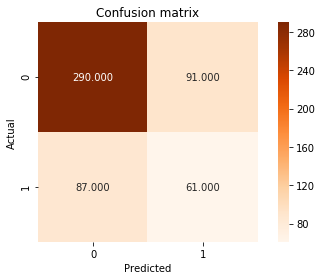

In [214]:
# TASK 7 CONTINUED - Decision Trees(Confusion Matrix)
#'Percent 65 and Older','Percent White','Percent Black or African American']],data_train['Party']
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [215]:
# TASK 7 CONTINUED - Decision Trees(Evaluation Matrix)
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.6635160680529301

Error
0.33648393194706994

Precision
[0.76923077 0.40131579]

Recall
[0.76115486 0.41216216]

F1_score
[0.7651715  0.40666667]


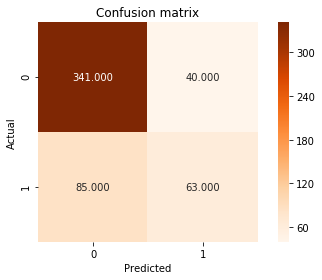

In [216]:
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix)
#'Percent 65 and Older','Percent White','Percent Black or African American']],data_train['Party']

classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [217]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix)
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7637051039697542

Error
0.23629489603024578

Precision
[0.80046948 0.61165049]

Recall
[0.89501312 0.42567568]

F1_score
[0.84510533 0.50199203]


In [218]:
# TASK 7 CONTINUED - With different combinations of parameters and different combinations of variables
#-- Republican prediction
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White','2014 Population']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1,  14,  1,  4.82500000e+01, 0.83578061, 1586, 1.586e+03)
 (  2,  13,  0,  1.60499992e+01, 0.45583146,   73, 7.300e+01)
 (  3,   4,  1,  3.35000000e+01, 0.65002242,   42, 4.200e+01)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   19, 1.900e+01)
 (  5,  12,  2,  4.19015000e+04, 0.88654089,   23, 2.300e+01)
 (  6,   7,  0,  1.26499996e+01, 1.        ,   14, 1.400e+01)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    4, 4.000e+00)
 (  8,   9,  2,  1.76980000e+04, 0.8812909 ,   10, 1.000e+01)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    6, 6.000e+00)
 ( 10,  11,  0,  1.46499996e+01, 0.81127812,    4, 4.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    1, 1.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    3, 3.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,    9, 9.000e+00)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   31, 3.100e+01)
 ( 15, 686,  2,  2.50322000e+05, 0.78712659, 1513, 1.513e+03)
 ( 16, 679,  0,  2.58999996e+01, 0.73507208, 1379, 1.379e+03)
 ( 17,  

763

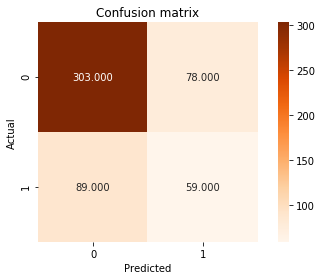

In [219]:
# TASK 7 CONTINUED - Decision Trees(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [220]:
# TASK 7 CONTINUED - Decision Trees(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.6843100189035917

Error
0.31568998109640833

Precision
[0.77295918 0.43065693]

Recall
[0.79527559 0.39864865]

F1_score
[0.7839586  0.41403509]


In [221]:
# TASK 7 CONTINUED - With different combinations of parameters and different combinations of variables
# -- Democratic prediction
x_train, x_test, y_train, y_test = train_test_split(data_train[["Percent Bachelor's Degree or Higher",'Percent Black or African American','Percent Hispanic or Latino']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

[(  1, 720,  1, 53.04999924, 0.83578061, 1586, 1.586e+03)
 (  2, 601,  0, 28.95000076, 0.80294025, 1540, 1.540e+03)
 (  3, 600,  2, 66.8999939 , 0.72822732, 1324, 1.324e+03)
 (  4, 581,  1, 42.84999847, 0.7021613 , 1303, 1.303e+03)
 (  5,  48,  2,  0.85000002, 0.68573603, 1276, 1.276e+03)
 (  6,  47,  0, 15.60000038, 0.99800088,   38, 3.800e+01)
 (  7,   8,  2,  0.44999999, 0.99941106,   35, 3.500e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    2, 2.000e+00)
 (  9,  10,  2,  0.55000001, 0.99403021,   33, 3.300e+01)
 ( -1,  -1, -2, -2.        , 0.        ,    3, 3.000e+00)
 ( 11,  46,  1, 22.25      , 1.        ,   30, 3.000e+01)
 ( 12,  45,  1,  2.25      , 0.99631652,   28, 2.800e+01)
 ( 13,  44,  1,  1.79999995, 0.99884554,   25, 2.500e+01)
 ( 14,  39,  0, 12.39999962, 0.99863596,   23, 2.300e+01)
 ( 15,  38,  1,  0.75      , 0.99107606,   18, 1.800e+01)
 ( 16,  37,  0, 11.89999962, 1.        ,   16, 1.600e+01)
 ( 17,  36,  0, 11.39999962, 0.99679163,   15, 1.500e+01)
 ( 18,  19,  2

727

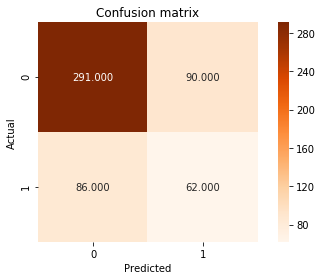

In [222]:
# TASK 7 CONTINUED - Decision Trees(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [223]:
# TASK 7 CONTINUED - Decision Trees(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.667296786389414

Error
0.33270321361058597

Precision
[0.77188329 0.40789474]

Recall
[0.76377953 0.41891892]

F1_score
[0.76781003 0.41333333]


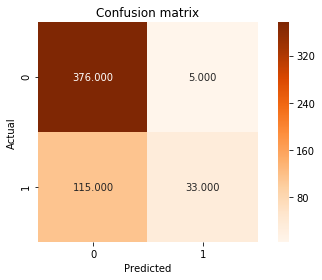

In [224]:
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
#-- Republican prediction
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White','2014 Population']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [225]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7731568998109641

Error
0.22684310018903586

Precision
[0.76578411 0.86842105]

Recall
[0.98687664 0.22297297]

F1_score
[0.86238532 0.35483871]


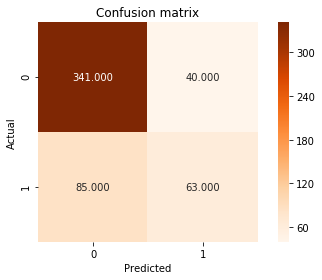

In [226]:
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
#-- Democratic predictio, Naive Bayes
x_train, x_test, y_train, y_test = train_test_split(data_train[["Percent Bachelor's Degree or Higher",'Percent Black or African American','Percent Hispanic or Latino']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [227]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7637051039697542

Error
0.23629489603024578

Precision
[0.80046948 0.61165049]

Recall
[0.89501312 0.42567568]

F1_score
[0.84510533 0.50199203]


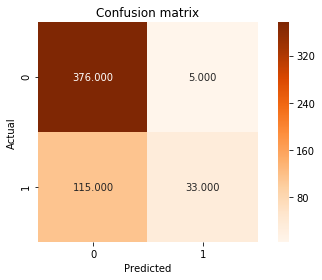

In [228]:
#TASK 7: Changing Parameters of Classification with highest Accuracy
# TASK 7 CONTINUED - Naive Bayes(Confusion Matrix) With different combinations of parameters 
# and different combinations of variables
#-- Republican prediction
x_train, x_test, y_train, y_test = train_test_split(data_train[['Percent 65 and Older','Percent White','2014 Population']],data_train['Party'],test_size=0.25,random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [229]:
# TASK 7 CONTINUED - Naive Bayes(Evaluation Matrix) With different combinations of parameters 
# and different combinations of variables
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7731568998109641

Error
0.22684310018903586

Precision
[0.76578411 0.86842105]

Recall
[0.98687664 0.22297297]

F1_score
[0.86238532 0.35483871]


In [ ]:
# TASK 8 - Build a clustering model to cluster the counties. Consider at least two different clustering techniques 
# with multiple combinations of parameters and multiple combinations of variables. Compute unsupervised and supervised 
# evaluation metrics with the party of the counties (Democratic or Republican) as the true cluster and report your 
# results.

In [114]:
# TASK 8 CONTINUED - Favoring the republican party
X = data_train[['Percent 65 and Older', 'Percent White','Percent High School or Higher']]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [115]:
# TASK 8 CONTINUED - HINT: Use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

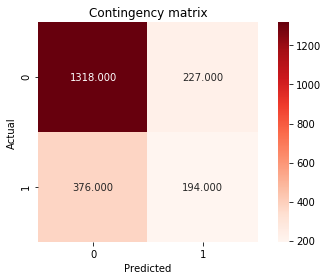

In [116]:
# TASK 8 CONTINUED - plot contingency matrix for hierarchical clustering with complete linkage method
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [122]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.046651268834218815


silhouette_coefficient
0.5868011893127529


In [123]:
# TASK 8 CONTINUED - Favoring the republican party cont'd
X = data_train[['2014 Population']]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [124]:
# TASK 8 CONTINUED - HINT: Use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

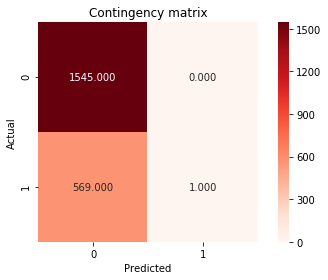

In [125]:
# TASK 8 CONTINUED - plot contingency matrix for hierarchical clustering with complete linkage method
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [126]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.0016166956778420718


silhouette_coefficient
0.9834424440274637


In [118]:
# TASK 8 CONTINUED - Favoring the democratic party
X = data_train[['Percent Asian','Percent Black or African American','Percent Hispanic or Latino',"Percent Bachelor's Degree or Higher"]]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [119]:
# TASK 8 CONTINUED - HINT: Use scipy.cluster.hierarchy.linkage with complete linkage as the method and
# Euclidean distance as the distance metric
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

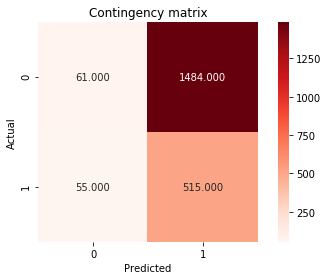

In [120]:
# TASK 8 CONTINUED - plot contingency matrix for hierarchical clustering with complete linkage method
#data['clusters'] = clusters - 1;
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [121]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.046651268834218815


silhouette_coefficient
0.5868011893127529


In [191]:
# TASK 8: K-Means clustering - Favoring Democratic Party
# HINT: use sklearn.cluster.KMeans with random initialization of centroids, 10 iterations,
# and parameter random_state set to 0
#--Rep
X = data_train[['Percent 65 and Older', 'Percent White','Percent High School or Higher']]
Y = data_train['Party']


scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

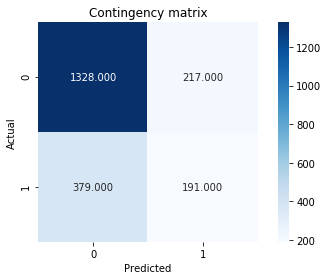

In [192]:
# TASK 8: plot contingency matrix for K-Means clustering
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [193]:
# TASK 8: compute evaluation metrics for K-Means clustering
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.1196750582169202, 0.5913655927525707]


In [203]:
# TASK 8: K-Means clustering - Favoring Democratic 
# HINT: use sklearn.cluster.KMeans with random initialization of centroids, 10 iterations,
# and parameter random_state set to 0
#--Rep
X = data_train[['2014 Population']]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

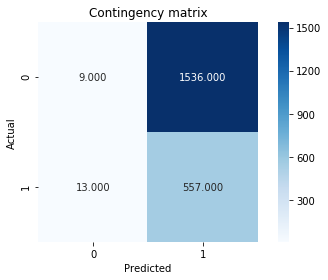

In [204]:
# TASK 8: plot contingency matrix for K-Means clustering 
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [205]:
# TASK 8: compute evaluation metrics for K-Means clustering
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.015368381883860777, 0.9433470812651275]


In [206]:
# TASK 8: K-Means clustering - Favoring Democratic
# HINT: use sklearn.cluster.KMeans with random initialization of centroids, 10 iterations,
# and parameter random_state set to 0
#--Dem
X = data_train[['Percent Asian','Percent Black or African American','Percent Hispanic or Latino',"Percent Bachelor's Degree or Higher"]]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state = 0).fit(X)
clusters = clustering.labels_

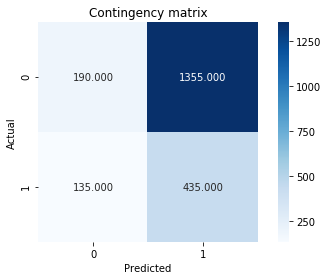

In [207]:
# TASK 8: plot contingency matrix for K-Means clustering
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [208]:
# TASK 8: compute evaluation metrics for K-Means clustering
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.07251889384473625, 0.49834367894265885]


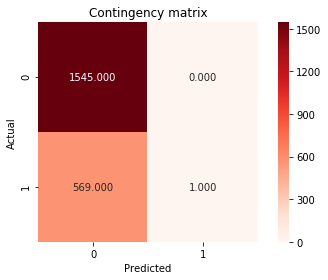

In [251]:
#TASK 8: Changing Parameters of Classification with highest Silhouette Coefficient
X = data_train[['2014 Population']]
Y = data_train['Party']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

clustering = linkage(X, method = "complete", metric = "Euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust', depth = 1)

cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()



In [231]:
# TASK 8 CONTINUED
adjusted_rand_index = metrics.adjusted_rand_score(Y,clusters) 
silhouette_coefficient = metrics.silhouette_score(X,clusters,metric='euclidean') 

print("adjusted_rand_index")
print(adjusted_rand_index)
print("\n")

print("silhouette_coefficient")
print(silhouette_coefficient)

adjusted_rand_index
0.0016166956778420718


silhouette_coefficient
0.9834424440274637
